In [1]:

import pandas as pd
from pandas import DataFrame
import json

with open('BDAA.json') as f:
    df = DataFrame(json.loads(line) for line in f)



In [2]:
df.head()


,_id,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,filter_level,geo,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,{u'$oid': u'56674dd2795cef1ba469bb9b'},None,None,Tue Dec 08 21:38:28 +0000 2015,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,0,False,low,None,...,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Has Donald Trump ever actually been to London?,1449610708995,False,"{u'follow_request_sent': None, u'profile_use_b..."
1,{u'$oid': u'56674dd2795cef1ba469bb9c'},None,None,Tue Dec 08 21:38:28 +0000 2015,"{u'symbols': [], u'user_mentions': [{u'indices...",NaN,0,False,low,None,...,NaN,NaN,0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @DavidLimbaugh: Regardless of your opinion ...,1449610708958,False,"{u'follow_request_sent': None, u'profile_use_b..."
2,{u'$oid': u'56674dd2795cef1ba469bb9d'},None,None,Tue Dec 08 21:38:29 +0000 2015,"{u'symbols': [], u'user_mentions': [{u'indices...",NaN,0,False,low,None,...,NaN,NaN,0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @okaymoe: Donald Trump look like a crispy L...,1449610709155,False,"{u'follow_request_sent': None, u'profile_use_b..."
3,{u'$oid': u'56674dd2795cef1ba469bb9e'},None,None,Tue Dec 08 21:38:29 +0000 2015,"{u'symbols': [], u'user_mentions': [{u'indices...",NaN,0,False,low,None,...,NaN,NaN,0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @LordSnow: Arya's list:\n\n-The Mountain\n-...,1449610709190,False,"{u'follow_request_sent': None, u'profile_use_b..."
4,{u'$oid': u'56674dd2795cef1ba469bb9f'},None,None,Tue Dec 08 21:38:29 +0000 2015,"{u'symbols': [], u'user_mentions': [{u'indices...",NaN,0,False,low,None,...,{u'$numberLong': u'674340376996614144'},674340376996614144,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@MK8 @xJMxMara OMG THIS IS SO TRUE!! MUST RT A...,1449610709025,False,"{u'follow_request_sent': None, u'profile_use_b..."


In [16]:
#Create a new dataframe using only the tweets
df2=DataFrame(df['text'])
df2.columns=['tweets']

In [17]:
df2.head()

,tweets
0,Has Donald Trump ever actually been to London?
1,RT @DavidLimbaugh: Regardless of your opinion ...
2,RT @okaymoe: Donald Trump look like a crispy L...
3,RT @LordSnow: Arya's list:\n\n-The Mountain\n-...
4,@MK8 @xJMxMara OMG THIS IS SO TRUE!! MUST RT A...


In [5]:

# Break down tweets into three lists, depending upon whether they contain the word Trump, Clinton or both. I will use 
#This for analysis later. I AM AWARE that if I would've made everything lower-case first, I could have accomplished
# what is below with half the code. But, this is a learning process, isn't it?
clinton_list=[]
trump_list=[]
trump_and_clinton=[]

for i in df2['tweets']:
    if "Clinton" in i and "trump" and "Trump" not in i:
        clinton_list.append(i)
    elif "clinton" in i and "trump" and "Trump" not in i:
        clinton_list.append(i)
    elif "trump" in i and "clinton" and "Clinton" not in i:
        trump_list.append(i)
    elif "Trump" in i and "clinton" and "Clinton" not in i:
        trump_list.append(i)
    elif "trump" and "clinton"in i:
        trump_and_clinton.append(i)
    elif "Trump" and "clinton"in i:
        trump_and_clinton.append(i)
    elif "trump" and "Clinton"in i:
        trump_and_clinton.append(i)
    elif "Trump" and "Clinton"in i:
        trump_and_clinton.append(i)

    else:
        continue

In [6]:
len(clinton_list)

1428

In [7]:
#Make all the tweets lower-case. Again, this will be used later.
trump_list2=[x.lower() for x in trump_list]
clinton_list2=[x.lower() for x in clinton_list]
trump_and_clinton2=[x.lower() for x in trump_and_clinton]
    

In [8]:
#Remove non-alphanumeric characters and replace with blank
import re
trump_list3=[]
rex = re.compile(r'\W')
for s in trump_list2:
    result = rex.sub(' ', s)
    trump_list3.append(result)


In [9]:
import re
clinton_list3=[]
rex = re.compile(r'\W')
for s in clinton_list2:
    result = rex.sub(' ', s)
    clinton_list3.append(result)

In [10]:
import re
trump_and_clinton3=[]
rex = re.compile(r'\W')
for s in trump_and_clinton2:
    result = rex.sub(' ', s)
    trump_and_clinton3.append(result)

In [11]:
trump_list_df=DataFrame(trump_list3)
clinton_list_df=DataFrame(clinton_list3)
trump_and_clinton_df=DataFrame(trump_and_clinton3)

In [12]:
trump_and_clinton_df.head()

,0
0,rt iainmartin1 here s hillary clinton condem...
1,rt hillaryclinton trump s hateful comments a...
2,rt iainmartin1 here s hillary clinton condem...
3,the two leading presidential candidates cli...
4,rt hillaryclinton this is reprehensible pre...


In [13]:
#To analyze most popular @ and # mentions, the tweets containing each must be isolated
strings=DataFrame([])
def at_fun(strings):
    for string in strings:
        if '@' in strings:
            string=strings.split()
        if '@' not in strings:
            continue
        return strings
def hash_fun(strings):
    for string in strings:
        if '#' in strings:
            string=strings.split()
        if '#' not in strings:
            continue
        return strings

In [19]:
#Apply functions to generate two new columns for tweets that contain either a hashtag or at-symbol
df2['ats']=df2['tweets'].apply(at_fun)
df2['hash']=df2['tweets'].apply(hash_fun)


In [20]:
# Now all other text needs to be seperated into different rows, so non-hash and at-symbol words can be isolated
#Split all words into new rows
s = df2["ats"].str.split(' ').apply(pd.Series, 1).stack()
t = df2["hash"].str.split(' ').apply(pd.Series, 1).stack()

In [21]:
#Apply functions again to save only words with a hashtag or at symbol
at_trim_df=pd.Series([at_fun(x) for x in s])
hash_trim_df=pd.Series([hash_fun(x) for x in t])

In [22]:
#Drop null values that were words that did not contain a symbol
hash_trim_df=DataFrame(hash_trim_df.dropna())
at_trim_df=DataFrame(at_trim_df.dropna())


In [23]:
hash_trim_df.head()

,0
10,#TrumpIsDisqualifiedParty
28,#TrumpIsDisqualifiedParty
32,#YouMightBeALiberal
65,#usa
66,#trump


In [24]:
#Make all letters lower
def lower_fun(words):
    word=words.lower()
    return word

In [25]:
at_trim_df.columns=['at']
hash_trim_df.columns=['hash']

In [26]:
hash_trim_df_clean=hash_trim_df['hash'].apply(lower_fun)
at_trim_df_clean=at_trim_df['at'].apply(lower_fun)

In [27]:
#trim colon
at_trim_df_clean=at_trim_df_clean.replace(to_replace=":", value="",regex=True)

hash_trim_df_clean=hash_trim_df_clean.replace(to_replace=":", value="",regex=True)


In [28]:
#Because we see trump and trump. counted as different hashtags, when we count hashes, 
#we need to remove periods from the end of the hashes


def period_fun(strings):
    for string in strings:
        if ('.') in strings[-1]:
            string=strings[0:-1] 
        else:
            string=strings
        return string

In [29]:
hash_trim_df_clean=hash_trim_df_clean.apply(period_fun)

In [30]:
hash_trim_df_clean.head()

10    #trumpisdisqualifiedparty
28    #trumpisdisqualifiedparty
32          #youmightbealiberal
65                         #usa
66                       #trump
Name: hash, dtype: object

In [31]:
#Counts all values in column and returns it as an array
at_trim_df_clean=DataFrame(at_trim_df_clean)
hash_trim_df_clean=DataFrame(hash_trim_df_clean)
at_trim_df_counts= at_trim_df_clean.stack().value_counts()

hash_trim_df_counts= hash_trim_df_clean.stack().value_counts()

In [32]:
hash_trim_df_counts=DataFrame(hash_trim_df_counts)
at_trim_df_counts=DataFrame(at_trim_df_counts)


In [33]:
hash_trim_df_counts.columns=["Count"]
at_trim_df_counts.columns=["Count"]

In [34]:
at_trim_df_counts.head()

,Count
@realdonaldtrump,1471
@jk_rowling,791
@viralbuzznewss,690
@hoodinigotclout,485
@foxnews,220


In [35]:
#Filter values for those greater-than some threshold:
at_trim_df_counts['popular_at']=at_trim_df_counts["Count"]>=148
hash_trim_df_counts['popular_at']=hash_trim_df_counts["Count"]>=80

In [36]:
#SHow only results of true values

at_trim_counts_filtered=DataFrame(at_trim_df_counts.loc[at_trim_df_counts['popular_at'] == True])

hash_trim_counts_filtered=DataFrame(hash_trim_df_counts.loc[hash_trim_df_counts['popular_at'] == True])

In [37]:
hash_trim_counts_filtered

,Count,popular_at
#trump,1497,True
#trump2016,354,True
#tcot,284,True
#donaldtrump,282,True
#trumpisdisqualifiedparty,250,True
#news,191,True
#makeamericagreatagain,177,True
#gop,121,True
#uniteblue,102,True
#scream,87,True


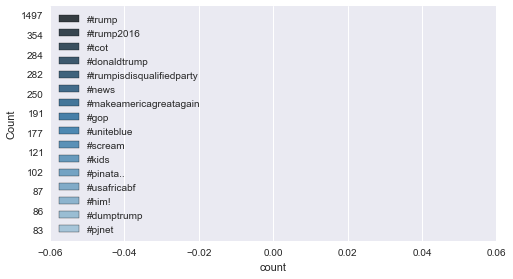

In [38]:
#Now we can plot the most popular hashtags
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(num=None, figsize=(8, 4.2), dpi=1000)



g=sns.countplot(y="Count", data=hash_trim_counts_filtered,hue=hash_trim_counts_filtered.index, palette="Blues_d")

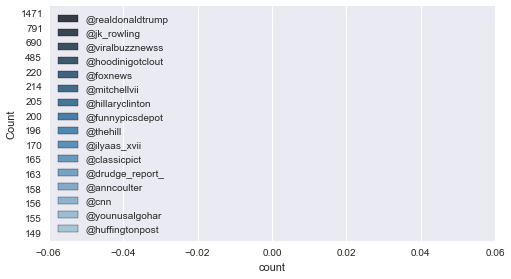

In [39]:
#Now we can plot the most popular at symbols


plt.figure(num=None, figsize=(8, 4.2), dpi=1000)



g=sns.countplot(y="Count", data=at_trim_counts_filtered,hue=at_trim_counts_filtered.index, palette="Blues_d")

Now we can turn to sentiment analysis. I will analyse each of the three lists I made earlier. Citation for the use of the excellent VADER sentiment tool is below.

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014. 

In [40]:
from vaderSentiment.vaderSentiment import sentiment as vaderSentiment

In [41]:
trump_list_df.columns=["Tweet"]
clinton_list_df.columns=["Tweet"]
trump_and_clinton_df.columns=['Tweet']

In [42]:
#I u se a function to apply the VADER program, so errors do not "kill" the process.
def sent_fun(word):
    for i in word:
        try:
            s=vaderSentiment(word)
            
        except:
            s=''
            
        return s


In [43]:
trump_sentiment=trump_list_df['Tweet'].apply(sent_fun)
clinton_sentiment=clinton_list_df['Tweet'].apply(sent_fun)
clinton_and_trump_sentiment=trump_and_clinton_df['Tweet'].apply(sent_fun)

In [44]:
trump_sentiment=dict(trump_sentiment)
clinton_sentiment=dict(clinton_sentiment)
clinton_and_trump_sentiment=dict(clinton_and_trump_sentiment)

In [45]:
trump_sentiment_df=DataFrame(trump_sentiment)
clinton_sentiment_df=DataFrame(clinton_sentiment)
clinton_and_trump_sentiment_df=DataFrame(clinton_and_trump_sentiment)

In [46]:
trump_sentiment_df.head()


,0,1,2,3,4,5,6,7,8,9,...,28605,28606,28607,28608,28609,28610,28611,28612,28613,28614
compound,0,0.6249,-0.250,0,0.5598,-0.9313,0,-0.4767,-0.340,-0.5574,...,0,0,0,0,-0.8402,0,0,0,0.4523,0.2023
neg,0,0.0000,0.219,0,0.0000,0.4650,0,0.2610,0.091,0.2050,...,0,0,0,0,0.3080,0,0,0,0.0780,0.0980
neu,1,0.8490,0.625,1,0.7950,0.5350,1,0.6300,0.909,0.7950,...,1,1,1,1,0.6920,1,1,1,0.7300,0.7690
pos,0,0.1510,0.156,0,0.2050,0.0000,0,0.1090,0.000,0.0000,...,0,0,0,0,0.0000,0,0,0,0.1920,0.1320


In [47]:
#Transpose the dataframes
trump_sentiment_df=trump_sentiment_df.T
clinton_sentiment_df=clinton_sentiment_df.T
clinton_and_trump_sentiment_df=clinton_and_trump_sentiment_df.T

In [48]:
trump_sentiment_df.head()

,compound,neg,neu,pos
0,0.0000,0.000,1.000,0.000
1,0.6249,0.000,0.849,0.151
2,-0.2500,0.219,0.625,0.156
3,0.0000,0.000,1.000,0.000
4,0.5598,0.000,0.795,0.205


In [49]:
#FInds the sum for each column
trump_compound_sum=trump_sentiment_df['compound'].sum()
trump_neg_sum=trump_sentiment_df['neg'].sum()
trump_pos_sum=trump_sentiment_df['pos'].sum()
trump_neu_sum=trump_sentiment_df['neu'].sum()


In [50]:
trump_neg_sum


2608.4979999999514

In [51]:

trump_pos_sum

2212.3120000000263

In [52]:
trump_compound_sum

-1309.0999999999924

In [53]:
trump_neu_sum

23794.34800000055

In [54]:
clinton_sentiment_df.head()

,compound,neg,neu,pos
0,0.0000,0.000,1.000,0.000
1,0.0000,0.000,1.000,0.000
2,-0.4194,0.331,0.480,0.188
3,0.0000,0.000,1.000,0.000
4,-0.4404,0.116,0.884,0.000


In [55]:
clinton_compound_sum=clinton_sentiment_df['compound'].sum()
clinton_neg_sum=clinton_sentiment_df['neg'].sum()
clinton_pos_sum=clinton_sentiment_df['pos'].sum()
clinton_neu_sum=clinton_sentiment_df['neu'].sum()

In [56]:
clinton_compound_sum

-9.78039999999998

In [57]:
clinton_neg_sum

110.62799999999996

In [58]:
clinton_pos_sum

105.69400000000005

In [59]:
clinton_neu_sum

1211.681999999998

In [60]:
clinton_and_trump_compound_sum=clinton_and_trump_sentiment_df['compound'].sum()
clinton_and_trump_neg_sum=clinton_and_trump_sentiment_df['neg'].sum()
clinton_and_trump_pos_sum=clinton_and_trump_sentiment_df['pos'].sum()
clinton_and_trump_neu_sum=clinton_and_trump_sentiment_df['neu'].sum()

In [61]:
clinton_and_trump_compound_sum

-55.14179999999995

In [62]:
clinton_and_trump_neg_sum

96.28000000000041

In [63]:
clinton_and_trump_pos_sum

75.93300000000019

In [64]:
clinton_and_trump_neu_sum

636.837999999998

In [65]:
#To now see the tweets and their appertaining sentiments:
trump_frames=[trump_list_df,trump_sentiment_df]
trump_frames_df=pd.concat(trump_frames, axis=1)
clinton_frames=[clinton_list_df,clinton_sentiment_df]
clinton_frames_df=pd.concat(clinton_frames, axis=1)
clinton_and_trump_frames=[trump_and_clinton_df,clinton_and_trump_sentiment_df]
clinton_and_trump_frames_df=pd.concat(clinton_and_trump_frames, axis=1)

In [66]:
trump_frames_df.head()

,Tweet,compound,neg,neu,pos
0,has donald trump ever actually been to london,0.0000,0.000,1.000,0.000
1,rt davidlimbaugh regardless of your opinion ...,0.6249,0.000,0.849,0.151
2,rt okaymoe donald trump look like a crispy l...,-0.2500,0.219,0.625,0.156
3,rt lordsnow arya s list the mountain que...,0.0000,0.000,1.000,0.000
4,mk8 xjmxmara omg this is so true must rt a...,0.5598,0.000,0.795,0.205


In [67]:
clinton_frames_df.head()

,Tweet,compound,neg,neu,pos
0,rt pollreport president democratic preferenc...,0.0000,0.000,1.000,0.000
1,clinton obama amp panetta benghazi coverup...,0.0000,0.000,1.000,0.000
2,clinton wins on budget but more lies ahead,-0.4194,0.331,0.480,0.188
3,rt eileenleft new poll finds hillary clinto...,0.0000,0.000,1.000,0.000
4,rt mtapscott new clinton email shows dod tol...,-0.4404,0.116,0.884,0.000


In [68]:
clinton_and_trump_frames_df.head()

,Tweet,compound,neg,neu,pos
0,rt iainmartin1 here s hillary clinton condem...,0.0000,0.000,1.000,0.000
1,rt hillaryclinton trump s hateful comments a...,-0.3612,0.230,0.592,0.178
2,rt iainmartin1 here s hillary clinton condem...,0.0000,0.000,1.000,0.000
3,the two leading presidential candidates cli...,0.1531,0.113,0.750,0.137
4,rt hillaryclinton this is reprehensible pre...,-0.0754,0.129,0.755,0.116


From this point, we could then create a classifier from the sentiments. But for now, this concludes the project.